<a href="https://colab.research.google.com/github/arnualien/Dice/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.layers import Reshape
from keras.optimizers import SGD



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
testing_path= '/content/drive/MyDrive/test_set/test_set'
training_path = '/content/drive/MyDrive/training_set/training_set'

In [ ]:
ls

 cat_dog_alexnet.h5   Chikmanglur/        Model_Test_Img/   training_set/
 Cat_dog.zip         'Colab Notebooks'/   test_set/


In [ ]:
!unzip Cat_dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [ ]:
# to bring the data into lower range [0,1]
data_in_lower_range = ImageDataGenerator(rescale=1/255.)

In [ ]:
trainiing_set = data_in_lower_range.flow_from_directory(training_path,target_size=(227,227),batch_size=32,class_mode="categorical")
testing_set  = data_in_lower_range.flow_from_directory(testing_path,target_size=(227,227),batch_size=32,class_mode="categorical")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
training_data = next(trainiing_set)

In [ ]:
training_data

(array([[[[0.6392157 , 0.7568628 , 0.8588236 ],
          [0.6392157 , 0.7568628 , 0.8588236 ],
          [0.63529414, 0.75294125, 0.854902  ],
          ...,
          [0.7568628 , 0.83921576, 0.91372555],
          [0.7568628 , 0.83921576, 0.91372555],
          [0.75294125, 0.8352942 , 0.909804  ]],
 
         [[0.6431373 , 0.7607844 , 0.86274517],
          [0.6431373 , 0.7607844 , 0.86274517],
          [0.6392157 , 0.7568628 , 0.8588236 ],
          ...,
          [0.7568628 , 0.83921576, 0.91372555],
          [0.7568628 , 0.83921576, 0.91372555],
          [0.75294125, 0.8352942 , 0.909804  ]],
 
         [[0.654902  , 0.7607844 , 0.86666673],
          [0.6509804 , 0.7568628 , 0.86274517],
          [0.6509804 , 0.7568628 , 0.86274517],
          ...,
          [0.76470596, 0.8352942 , 0.91372555],
          [0.76470596, 0.8352942 , 0.91372555],
          [0.7607844 , 0.8313726 , 0.909804  ]],
 
         ...,
 
         [[0.42352945, 0.3647059 , 0.38431376],
          [0.40392

In [ ]:
type(training_data)

tuple

In [ ]:
training_data[0][31].ndim

3

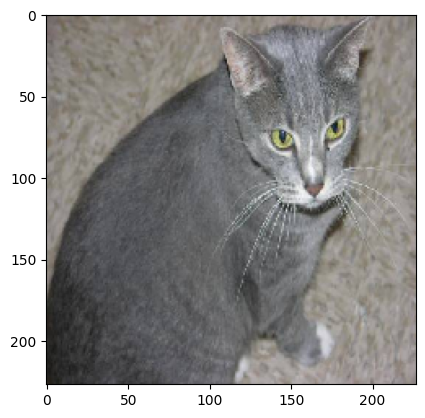

In [ ]:
plt.imshow(training_data[0][31])

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape =(227,227,3),activation="relu")) # Conv 1
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # Pool 1

model.add(Conv2D(256,(5,5),strides=(1,1),padding=("same"),activation="relu")) # Conv 2
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # Pool 2

model.add(Conv2D(384,(3,3),strides=(1,1),padding=("same"),activation="relu")) # Conv 3


model.add(Conv2D(384,(3,3),strides=(1,1),padding=("same"),activation="relu")) #Conv 4


model.add(Conv2D(256,(3,3),strides=(1,1),padding=("same"),activation="relu")) #Conv 5
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) #Pool 5


model.add(Flatten())

# Dense layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting

# Output layer (number of units should be equal to the number of classes)
model.add(Dense(2, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model.compile(loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,289,538 (222.36 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.fit(trainiing_set,validation_data=testing_set,epochs=100)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 108s 229ms/step - accuracy: 0.5131 - loss: 0.6929 - val_accuracy: 0.5101 - val_loss: 0.6913
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 203ms/step - accuracy: 0.5398 - loss: 0.6902 - val_accuracy: 0.5739 - val_loss: 0.6818
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 202ms/step - accuracy: 0.5774 - loss: 0.6743 - val_accuracy: 0.5319 - val_loss: 0.6849
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 202ms/step - accuracy: 0.5949 - loss: 0.6633 - val_accuracy: 0.6436 - val_loss: 0.6386
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 50s 196ms/step - accuracy: 0.6531 - loss: 0.6267 - val_accuracy: 0.6797 - val_loss: 0.6197
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 198ms/step - accuracy: 0.6826 - loss: 0.5971 - val_accuracy: 0.7222 - val_loss: 0.5731
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 50s 196ms/step - accuracy: 0.7256 - loss: 0.5525 - val_accuracy: 0.6935 - val_loss: 0.5826
Epoch 8/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 83s 199ms/step - accuracy: 0.7298 - loss: 0.53

In [ ]:
model.save('/content/drive/MyDrive/cat_dog_alexnet.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model('/content/drive/MyDrive/cat_dog_alexnet.h5')

In [ ]:
image_path = '/content/drive/MyDrive/Model_Test_Img/pexels-pixabay-45201.jpg'
test_image = image.load_img(image_path,target_size=(227,227))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
test_image.shape
result = model.predict(test_image/255.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
predicted_class = np.argmax(result, axis=1)  # Get the index of the class with the highest probability

# Assuming class 0 is 'Cat' and class 1 is 'Dog'
if predicted_class == 0:
    prediction = 'Cat'
else:
    prediction = 'Dog'

In [ ]:
print(prediction)

Cat
